 ## Początek mojego uczenia w pytongu

 Póki co uczę się z książki Raschki, powoli oddtwarzam rozdział trzeci
 ## Temat
 Nauka perceptronu rozpoznawania rodzaju kosaśca(taki kwiatek) po jego cechach.

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()


In [4]:
X = iris.data[:, [2,3]]
y = iris.target


 ## Początek mojej pracy to zaimportowanie potrzebnych modułów
 Na początku uzywam funkcji train_test_split żeby z mojego datasetu podzielić wektor na testowy i treningowy.
 Parametr "test_size"  mówi o tym ile % wektora to trening. wartość od 0-1

In [5]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


 ## Standaryzacja danych
 Standaryzacja to operacja mająca na celu taką obróbkę danych,
 żeby dane pochodzące z różnych prób/populacji były ze sobą porównywalnej.
 Zwykle polega na obliczeniu różnicy między wartością pomiaru a średnią z próby i podzielenie jej
  przez odchylenie standardowe z tej próby. Dla danych standaryzowanych średnia wynosi zero natomiast odchylenie standardowe równa się jeden.
 ## Po co jest ta standaryzacja i jak ją wykonać
 Niektóre algorytmy uczenia wymagają aby wszystkie cechy były ustandaryzowane. Do standaryzacji użyję klasy StandardScaler z pakietu sklearn
 metoda StandardScaler.fit() oszacowywuje parametry:

 Wartości średniej próbek
 Odchylenie standardowe


 Za pomocą metody StandardScaler.Transform() standaryzujemy wartości próbek. Ważnym jeest, by standaryzować je na podstawie tych samych parametrów (otrzymanych z funkcji fit)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


 ## Tworzenie preceptronu
 Teraz, gdy już mamy przygotowane dane do naszego uczenia czas nauczyć pojedyńczy perceptron.

 ## Parametry perceptronu
 Parametr n_iter to liczba epok, czyli przebiegów po zestawie uczącym

  Parametr eta to współczynnik uczenia. Cytując ze strony:"Constant by which the updates are multiplied."

  Parametr random_state wprowadziliśmy w celu odwzorowania tasowania danych uczących po zakończeniu każdej epoki.
 ## Dobór współczynniku uczenia(eta):
 Dobór właściwego współczynnika uczenia wymaga eksperymentowania.
 Jeżeli przyjmiemy zbyt dużą jego wartość, algorytm rozminie się z globalnym minimum kosztu.
  Z kolei przy zbyt małej wartości współczynnika uczenia algorytm będzie potrzebował większej liczby epok do uzyskania zbieżności,
  co powoduje spowolnienie procesu uczenia — zwłaszcza w przypadku dużych zbiorów danych

In [7]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1,random_state=0)
ppn.fit(X_train_std, Y_train)


C:\Users\Pawel\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

 ## Predykcja
 Poniżej widać przykładowe dwie sposoby na oszacowanie błędu:

In [8]:
y_pred = ppn.predict(X_test_std)
print('Nieprawidłowo sklasyfikowane próbki: %d' % (Y_test != y_pred).sum())


Nieprawidłowo sklasyfikowane próbki: 9


In [9]:
y_pred = ppn.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Dokładność : %.2f' % accuracy_score(Y_test,y_pred))


Dokładność : 0.80


 ## Malowanie regionów decyzyjnych
 Malujemy owe regiony, aby ujrzeć na własne oczy, w jaki sposób algorytm rozdziela poszczególne próbki kwiatów.

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def versiontuple(v):
    return tuple(map(int),(v.split(".")))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2):
    # Konfiguracja kolorów znaczników oraz mapy kolorów
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #Rysowanie wykresu powierzchni decyzyjnej
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # rysuje wykres wszystkich próbek
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

    X_test, Y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='',
        alpha=1.0, linewidths=1, marker='o', edgecolors='k',
        s=80, label='Zestaw testowy')

 ## Rysunek:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


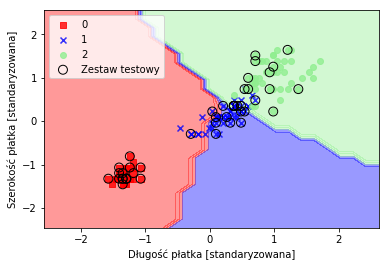

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.show()


 ## Wnioski
Wiemy że algorytm perceptronu nigdy nie jest zbieżny ze zbiorami danych,
  które nie są idealnie rozdzielne liniowo, dlatego właśnie stosowanie tego modelu zazwyczaj nie jest zalecane.

In [ ]:
print('dupa')